# Ford GoBike System Data Exploration
## by Vishal Kanojia


> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
df.shape

(519700, 15)

In [4]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
519695,435,2017-06-28 10:00:54.5280,2017-06-28 10:08:10.4380,81,Berry St at 4th St,37.775880,-122.393170,45,5th St at Howard St,37.781752,-122.405127,400,Subscriber,1991.0,Male
519696,431,2017-06-28 09:56:39.6310,2017-06-28 10:03:51.0900,66,3rd St at Townsend St,37.778742,-122.392741,321,5th at Folsom,37.780146,-122.403071,316,Subscriber,1973.0,Male
519697,424,2017-06-28 09:47:36.3470,2017-06-28 09:54:41.1870,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48,2nd St at S Park St,37.782411,-122.392706,240,Subscriber,1985.0,Female
519698,366,2017-06-28 09:47:41.6640,2017-06-28 09:53:47.7150,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,-122.418954,669,Subscriber,1981.0,Male
519699,188,2017-06-28 09:49:46.3770,2017-06-28 09:52:55.3380,25,Howard St at 2nd St,37.787522,-122.397405,48,2nd St at S Park St,37.782411,-122.392706,117,Subscriber,1984.0,Male


In [5]:
df.user_type.value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

In [6]:
df.member_gender.value_counts()

Male      348318
Female     98621
Other       6299
Name: member_gender, dtype: int64

In [7]:
df.start_station_name.value_counts()

San Francisco Ferry Building (Harry Bridges Plaza)                 15187
The Embarcadero at Sansome St                                      13664
San Francisco Caltrain (Townsend St at 4th St)                     12546
San Francisco Caltrain Station 2  (Townsend St at 4th St)          12055
Market St at 10th St                                               11960
Montgomery St BART Station (Market St at 2nd St)                   11334
Berry St at 4th St                                                 10956
Powell St BART Station (Market St at 4th St)                       10142
Howard St at Beale St                                               9926
Steuart St at Market St                                             9347
Powell St BART Station (Market St at 5th St)                        7987
Embarcadero BART Station (Beale St at Market St)                    7649
2nd St at Townsend St - Coming Soon                                 6605
3rd St at Townsend St                              

In [8]:
# make a copy of the original dataframe for the cleaning purposes
df_copy=df.copy()

In [9]:
df_copy['duration_min']=df_copy['duration_sec']/60

In [10]:
# extract month from start_time
df_copy['month']=df_copy['start_time'].str.extract('\-(\d{2})\-').astype(int)

In [11]:
#extract start station name 
import re
def extract_station_name(row):
    if '(' in row['start_station_name']:
        start_station = re.search('(.+)\(', row['start_station_name']).group(1)
    else:
        start_station = row['start_station_name']
    return start_station

In [12]:
df_copy['start_station'] = df_copy.apply(extract_station_name, axis=1)

In [13]:
# convert the start_time and end_time columns into datetime datatype
df_copy['start_time']=pd.to_datetime(df_copy['start_time'])
df_copy['end_time']=pd.to_datetime(df_copy['end_time'])

#convert the columns user_type and member_gender categorical datatype.
df_copy['user_type']=df_copy['user_type'].astype('category')
df_copy['member_gender']=df_copy['member_gender'].astype('category')

#convert the columns start_station_id and end_station_id to string/object datatypye.
df_copy['start_station_id']=df_copy['start_station_id'].to_string()
df_copy['end_station_id']=df_copy['end_station_id'].to_string()

In [14]:
# creating a new column member age group by applying pd.cut() method on member_birth_year column.
df_copy['member_age_group']=pd.cut(df_copy.member_birth_year, bins=[1947, 1975, 1988, 1998, 2000], labels=['Old', 'Adult', 'Young', 'Teenager'])

In [15]:
# creating a new column duration_category by applying pd.cut() method on duration_sec column.
df_copy['duration_category']=pd.cut(df_copy['duration_sec'], bins=[np.min(df_copy['duration_sec']), np.percentile(df_copy['duration_sec'], 25), np.percentile(df_copy['duration_sec'], 50), np.percentile(df_copy['duration_sec'],75), np.max(df_copy['duration_sec'])],
                                    labels=['Low', 'Below Average', 'Above Average', 'High']) 

In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 20 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null object
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null object
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null category
member_birth_year          453159 non-null float64
member_gender              453238 non-null category
duration_min               519700 non-null float64
month                      519700 non-null int32
start_station   

In [17]:
df_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,duration_min,month,start_station,member_age_group,duration_category
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,0 74\n1 284\n2 245\n3...,Laguna St at Hayes St,37.776435,-122.426244,0 43\n1 96\n2 245\n3...,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,1335.166667,12,Laguna St at Hayes St,Adult,High
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,0 74\n1 284\n2 245\n3...,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,0 43\n1 96\n2 245\n3...,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,1313.333333,12,Yerba Buena Center for the Arts,Old,High
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,0 74\n1 284\n2 245\n3...,Downtown Berkeley BART,37.870348,-122.267764,0 43\n1 96\n2 245\n3...,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,762.800000,12,Downtown Berkeley BART,NaN,High
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,0 74\n1 284\n2 245\n3...,8th St at Ringold St,37.774520,-122.409449,0 43\n1 96\n2 245\n3...,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,1036.200000,12,8th St at Ringold St,NaN,High
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,0 74\n1 284\n2 245\n3...,Bancroft Way at Telegraph Ave,37.868813,-122.258764,0 43\n1 96\n2 245\n3...,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,726.716667,12,Bancroft Way at Telegraph Ave,Young,High


## Dataset Overview

> There are 519700 rows in the dataset with 15 columns (duration_sec, start_time, end_time, start_station_id, start_station_name,
start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender). Also, I have applied a transfomation on the start_time column to extract the month of ride and store the values in month column. I have also created a new column duration_min to story durations in minutes.
> I created a column duration_category to categorize the duration of the ride.
> I created a column member_age_group to categorize the users on the basis of their age groups.

 
### Main feature(s) of interest in your dataset?

> I'm most interested in figuring out what are start stations that have the most distribution of bikes in greater San Francisco Bay area and their relationships with other variables.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the gender of the person taking the bike, type of user, member gender, member age group, duration of the ride are the main features that will majorly affect the bike being rented or not. 

In [18]:
df_copy.query('member_birth_year<1947').shape[0]

1687

# Univariate Exploration

For the further analysis parts, I will be focusing on the records that involves members who are of 70 years or below that. As the people who are older than 70 years are very less likely to take the bikes. Out of 519700 only 1678 records belong to the members who were born before 1947.

In [19]:
# selecting data for only those users who were born in or after 1947 
member_age=df_copy.query('member_birth_year >= 1947')

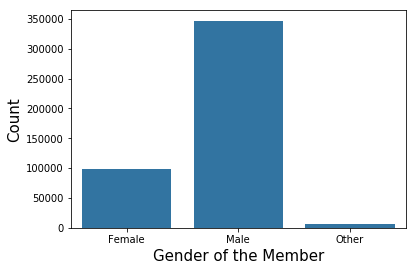

In [21]:
# plot a bar chart to check users from which gender are the more frequent users
base_color=sb.color_palette()[0]
sb.countplot(data=member_age, x='member_gender', color=base_color);
plt.xlabel('Gender of the Member', fontsize=15)
plt.ylabel('Count', fontsize=15);

> It is clearly evident that Males are more likely to ride the bikes than the other two genders.

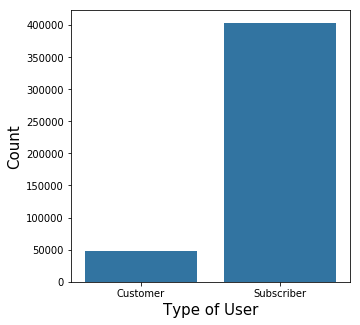

In [22]:
# plot a bar chart to check which user_type is more frequent
plt.figure(figsize=[5,5])
base_color=sb.color_palette()[0]
sb.countplot(data=member_age, x='user_type', color=base_color);
plt.xlabel('Type of User', fontsize=15)
plt.ylabel('Count', fontsize=15);

People belonging to Subscriber category are more likely to take the bikes than the people belonging to Customer category. 

In [23]:
member_age['duration_sec'].describe()

count    451472.000000
mean        832.594542
std        2520.210870
min          61.000000
25%         364.000000
50%         556.000000
75%         838.000000
max       86252.000000
Name: duration_sec, dtype: float64

In [24]:
member_age['duration_category'].value_counts()

Low              124518
Below Average    121568
Above Average    116692
High              88643
Name: duration_category, dtype: int64

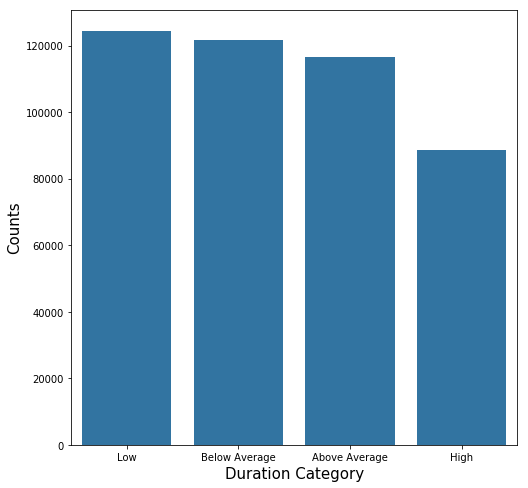

In [26]:
# plot a bar chart to check for what duration the users frequently take the bikes
plt.figure(figsize=[8,8])
sb.countplot(data=member_age, x='duration_category', color=base_color);
plt.xlabel('Duration Category', fontsize=15)
plt.ylabel('Counts', fontsize=15);

It seems like most of the people have taken the bikes for only short durations.

In [27]:
member_age.start_station.describe()

count                      451472
unique                        271
top       Powell St BART Station 
freq                        14564
Name: start_station, dtype: object

In [28]:
# selecting top 20 frequently used start stations
stn_order = member_age['start_station'].value_counts().index[:20]

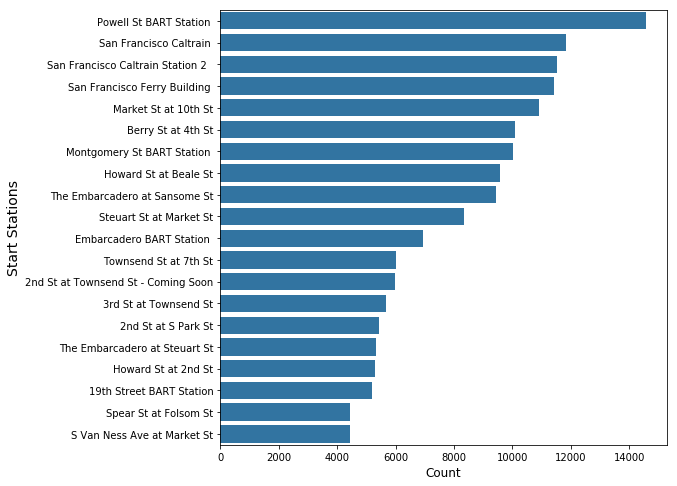

In [29]:
# plot a bar chart to check the frequently used start stations
plt.figure(figsize=[8,8])
sb.countplot(data=member_age, y='start_station', order=stn_order, color=base_color);
plt.ylabel('Start Stations', fontsize=14);
plt.xlabel('Count', fontsize=12);

Powell St BART Station is the most frequently used station for bike renting. Spear St at Folsom St and S Van Ness Ave at Market St are the two most least frequently used stations among the top 20 Start Stations.

In [30]:
member_age['member_age_group'].value_counts()

Adult       225980
Old         123668
Young       100391
Teenager       899
Name: member_age_group, dtype: int64

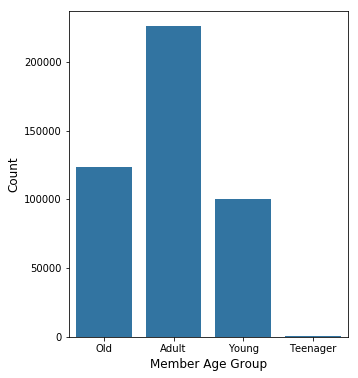

In [31]:
# plot a bar chart to see which member_age_group contains most users
plt.figure(figsize=[5,6])
sb.countplot(data=member_age, x='member_age_group', color=base_color);
plt.xlabel('Member Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12);

The Adult people are more into taking the bikes than any other age group. Teenagers are the least when it comes to take the bikes.  

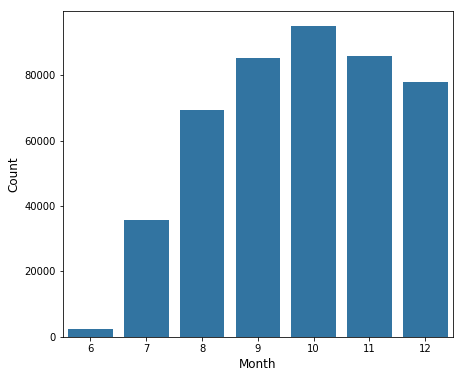

In [32]:
# plot a bar chart to the most preferred month 
plt.figure(figsize=[7,6])
sb.countplot(data=member_age, x='month', color=base_color);
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12);

9th and 10th months are second when it comes to most preffered month to rent the bike, whereas the 10th month tops the list.

### Relationships I observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 01. Males prefer to ride the bikes than any other gender.
> 02. Subscribers are more likely to take the bikes than the normal Customers. One reason could be that the Customer Category people are not well aware of this bike renting system or the other reason could be that the subscribers get the bikes on discount offers.
> 03. Adult people top the list when it comes to rent the bike. Whereas the Teenagers are down at the bottom. Probably, they are not allowed to ride bikes on roads by their parents.
> 04. Most people like to ride the bikes during October. One good reason for this result could be that the weather conditions are more pleasant during the 10th month (which is October).

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> 01. To get the month of ride, I used Python's re library to extract the month from the start time column and stored the values in the month column.
> 02. Created member_age_group column by applying pd.cut() of member_birth_year column.

# Bivariate Exploration

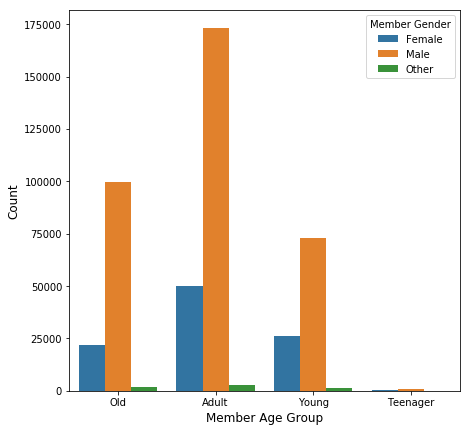

In [33]:
# plot a cluster bar chart for member_age_group and member_gender
plt.figure(figsize=[7,7])
sb.countplot(data=member_age, x='member_age_group', hue='member_gender');
plt.xlabel('Member Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Member Gender');

Both the male and female members belonging to Adult age group take the bikes more frequently as compared to males and females of the other two age groups. But female adults are still very less as compared to male adults.  

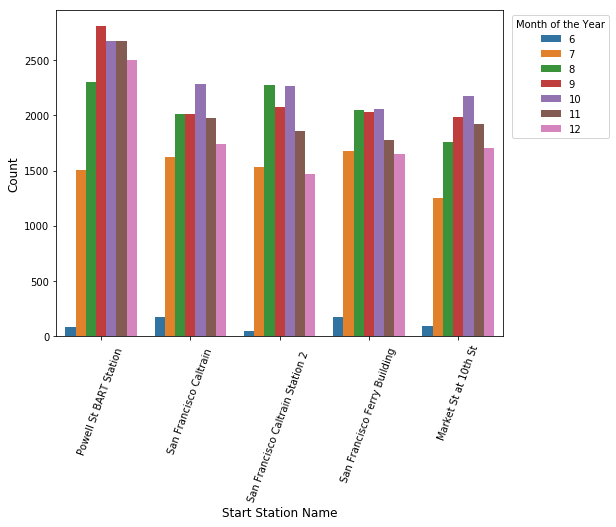

In [238]:
# plot a clustered bar plot to know the relationship between the top 5 start_station and month.
plt.figure(figsize=[8,6])
stn_order = member_age['start_station'].value_counts().index[:5]
sb.countplot(data=member_age, x='start_station', hue='month', order=stn_order);
plt.xlabel('Start Station Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=70);
plt.legend(loc=1, bbox_to_anchor=(1.25,1), title='Month of the Year');

In [35]:
stn_order=member_age['start_station'].value_counts().index[:5] # taking top 5 start stations.

<Figure size 576x576 with 0 Axes>

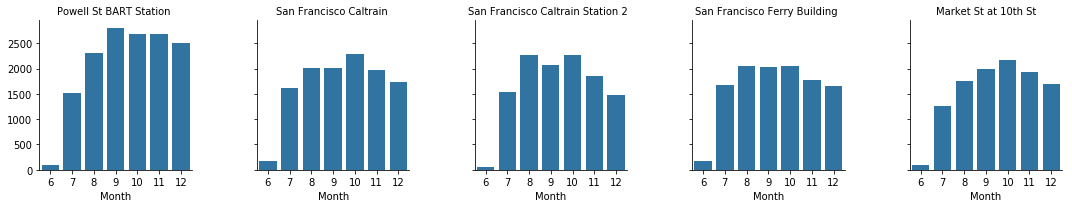

In [39]:
month_order=[6,7,8,9,10,11,12]
plt.figure(figsize=[8,8]);
g=sb.FacetGrid(data=member_age, col='start_station', col_wrap=5, col_order=stn_order);
g.map(sb.countplot, 'month', order=month_order);
g.set_xlabels('Month');
g.set_titles('{col_name}'); 

Powell St BART Station is more frequently used during the 9th month(September). 
For San Francisco Caltrain, it is 10th month (October). 
For San Francisco Caltrain Station 2, it is 8th (August) and 10th (October).
For San Francisco Ferry Building, 8th (August), 9th (September) and 10th (October) months are more preferred.
For Market St at 10th St, 10th (October) month is more preferred.

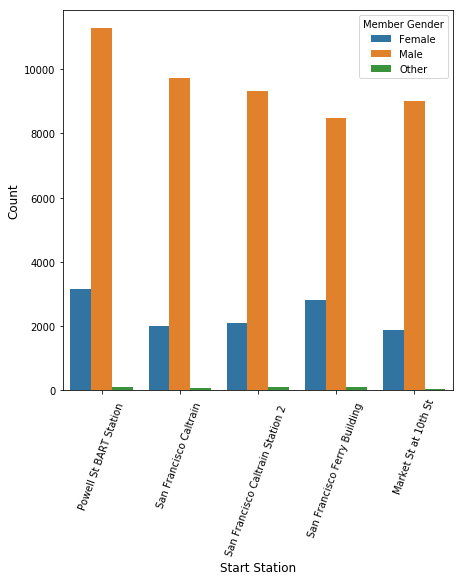

In [37]:
# plot the clustered bar chart to see the relationship between the start_station and member_gender.
plt.figure(figsize=[7,7])
stn_order=member_age['start_station'].value_counts().index[:5]
sb.countplot(data=member_age, x='start_station', hue='member_gender', order=stn_order);
plt.xlabel('Start Station', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=70)
plt.legend(title='Member Gender');

Powell St BART has more males as well as females as compared to other stations.

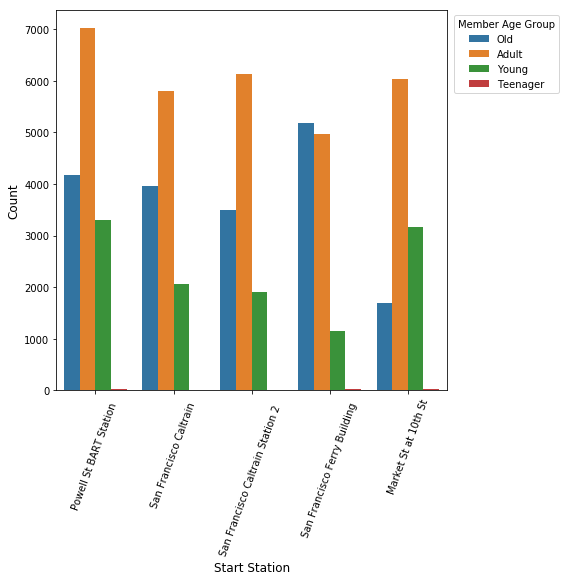

In [40]:
# plot the clustered bar chart to see the relationship between the start_station and member_age_group
plt.figure(figsize=[7,7])
stn_order=member_age['start_station'].value_counts().index[:5]
sb.countplot(data=member_age, x='start_station', hue='member_age_group', order=stn_order);
plt.xlabel('Start Station', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=70)
plt.legend(loc=1, bbox_to_anchor=(1.3,1), title='Member Age Group');

Again, Powell St BART Station is on top when it comes to number of users categorized on the basis of age groups. But this plot shows an interesting thing which I will be discussing below.

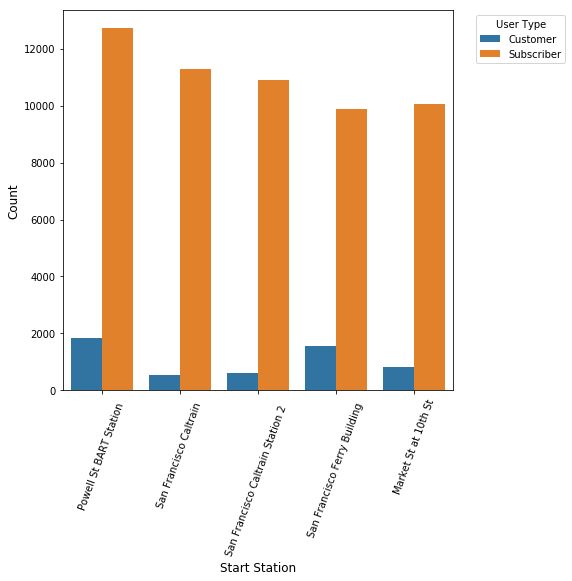

In [41]:
# plot the clustered bar chart to see the relationship between the start_station and user_type
plt.figure(figsize=[7,7])
stn_order=member_age['start_station'].value_counts().index[:5]
sb.countplot(data=member_age, x='start_station', hue='user_type', order=stn_order);
plt.xlabel('Start Station', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=70)
plt.legend(loc=1, bbox_to_anchor=(1.3,1), title='User Type');

Like the univariate visualizations, the users belonging to subscriber category are more frequent users for every station. 

### Relationships I observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 01. **member_age_group vs member_gender** : I plotted a clustered bar chart to see the relationship between these two variables and it turned out that both the male and female members belonging to Adult age group take the bikes more frequently as compared to males and females of the other two age groups. But female adults are still very less as compared to male adults.
>02. **Top 5 start_station vs month** : I plotter 2 plots to study the relationship properly. Firstly, I plotted a clustered bar chart and then I used FacetGrid to plot bar charts for the top 5 start stations vs the months. I concluded that Powell St BART Station is more frequently used during the 9th month(September). 
For San Francisco Caltrain, it is 10th month (October). 
For San Francisco Caltrain Station 2, it is 8th (August) and 10th (October).
For San Francisco Ferry Building, 8th (August), 9th (September) and 10th (October) months are more preferred.
For Market St at 10th St, 10th (October) month is more preferred.
>03. **start_station vs member_gender** : Since these two are categorical variables i plotted a clustered bar chart to understand the relationship between the two. I concluded that Powell St BART has more males as well as females as compared to other stations. One interesting thing that I noticed that inspite of being on 4th position among the frequently used start stations, San Francisco Ferry Building station has more number of female user than San Francisco Caltrain Station and San Francisco Caltrain Station 2.
>04. **start_station vs member_age_group** : Since these two are categorical variables i plotted a clustered bar chart to understand the relationship between the two.I noticed that San Francisco Ferry Building station has the most number of Old age group user than any other station. Whereas, Powell St BART Station has the most number of Adult age group users. 
>05. **start_station vs user_type** : For every station, the number of subscriber users are more than the normal customers. But San Francisco Ferry Building has more number of customer users than San Francisco Caltrain Station and San Francisco Caltrain Station 2.

# Multivariate Exploration

For multivariate exploration, I am taking only the top 5 start stations as we don't want to overcrowd the plots.  

In [42]:
member_age_subset=member_age.loc[member_age['start_station'].isin(['Powell St BART Station ', 'San Francisco Caltrain ',
                                                                          'San Francisco Caltrain Station 2  ', 'San Francisco Ferry Building ', 'Market St at 10th St'])]

In [43]:
member_age_subset.start_station.value_counts()

Powell St BART Station                14564
San Francisco Caltrain                11826
San Francisco Caltrain Station 2      11524
San Francisco Ferry Building          11414
Market St at 10th St                  10901
Name: start_station, dtype: int64

<Figure size 864x576 with 0 Axes>

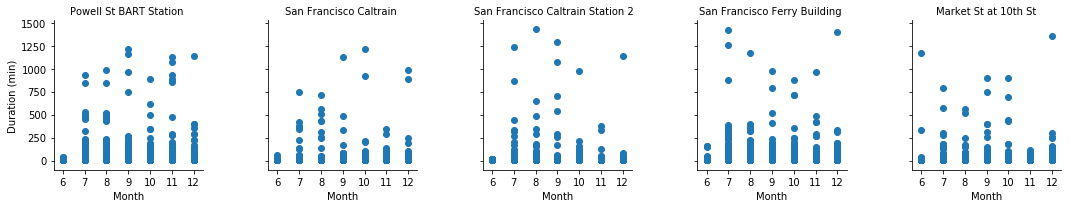

In [47]:
# plot a scatter plot to understand the relationship between month, duration_min and start_station.
plt.figure(figsize=[12,8])
xticks=[6,7,8,9,10,11,12]
g=sb.FacetGrid(data=member_age_subset, col='start_station', col_order=stn_order);
g.map(plt.scatter, 'month', 'duration_min');
g.set_titles('{col_name}')
g.set_xlabels('Month');
g.set_ylabels('Duration (min)');
plt.xticks(xticks);

For Powell St BART Station, the maximum duration was around 1215 minutes during 9th month (September). For San Francisco Caltrain, the maximum duration was also around 1210 minutes during 10th month (October). For San Francisco Caltrain station 2, maximum duration was around 1430 minutes during 8th month (August). For San Francisco Ferry building the maximum duration was around 1420 minutes during 7th month (July). For Market St at 10th St, the maximum duration was around 1350 during 12th month (December).

<Figure size 1080x720 with 0 Axes>

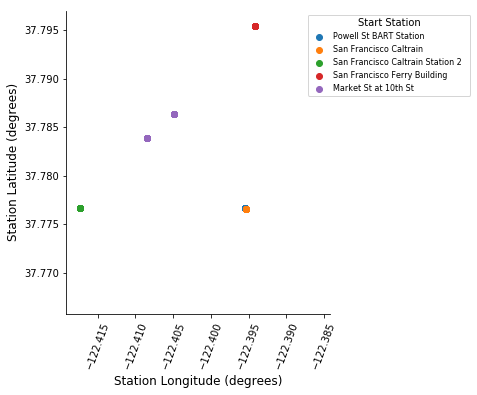

In [57]:
# plot a scatter plot to understand the relationship between start_station_longitude, start_station_latitude and start_station.
plt.figure(figsize=[15,10])
g=sb.FacetGrid(data=member_age_subset, hue='start_station', height=5);
g.map(plt.scatter, 'start_station_longitude', 'start_station_latitude');
g.set_xlabels('Station Longitude (degrees)',fontsize=12);
g.set_ylabels('Station Latitude (degrees)', fontsize=12);
plt.xticks(rotation=70);
plt.legend(labels=stn_order,bbox_to_anchor=(0.90,1) ,title='Start Station', fontsize=8);

Powell St BART Station and San Francisco Caltrain station have similar latitude and longitude. 

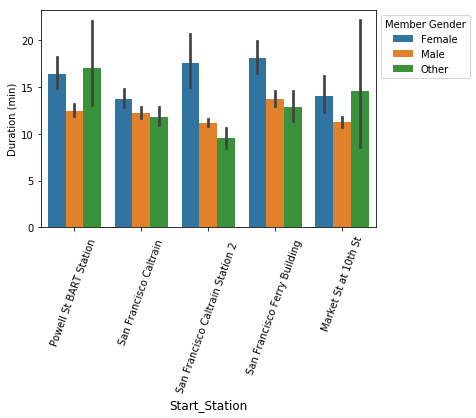

In [54]:
# plot a barplot to see the reationship between start_station, member_gender and duration_min
g=sb.barplot(data=member_age_subset, x='start_station', y='duration_min', hue='member_gender', order=stn_order, dodge = 0.3)
plt.legend(bbox_to_anchor=(1,1), title='Member Gender')
plt.xlabel('Start_Station', fontsize=12);
plt.ylabel('Duration (min)');
plt.xticks(rotation=70);

Almost for all the stations, females take the bikes for longer duration than males.

### Relationships I observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

For this part I took only the top 5 start stations as we don't want to overcrowd the plots.
> 01. **month vs duration_min vs start_station** : I plotted scatter plot using FacetGrid. I noticed that on an average the duration for every start station was around 12-14 minutes. The maximum duration in minutes was around 1420-1430 from San Francisco Caltrain station 2 and San Francisco Ferry stations in the months of August and July respectively.
> 02. **start_station vs start_station_longitude vs start_station_latitude** : I plotted a scatter plot for this relationship. I noticed that Powell St BART Station and San Francisco Caltrain station have similar latitude and longitude. Powell St BART Station and San Francisco Caltrain station are 1st and 2nd respectively on the list of most frequently used start stations. So, this means that either this location is easily accessible to the users or users like to take the routes passing through this location because of better roads or less traffic, maybe.
>03. **start_station, member_gender and duration_min** : As I am having 2 qualitative variable and one quantitative variable, I decided to plot a clusted bar chart. I noticed that if we ignore the unspecified gender (Other), for all the top 5 start stations females are taking bikes for a longer duration. One good reason could be that the females ride bikes slowly as compared to males.


### Interesting or surprising interactions between features

> One interesting thing I noticed that in the unvariate as well as in the bivariate visualizations, the most preferred month to take bikes is 10th i.e; October. But the longest rides in terms of duration (in minutes) were taken in July and August. A reason for this fact could be that during July and August the temperature is high and riders lose more energy while riding and hence slow down their speed. So, Climatic Conditions can also play a part in this case. 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!